# Plot multiple satellite BTs as a timeseries

This plots the minimum BT in a small scene focused on the supercold BT.
Each sensor / satellite is supplied as a separate CSV file, which are produced using external scripts.

In [1]:
from pandas.plotting import register_matplotlib_converters
from datetime import datetime, timedelta
register_matplotlib_converters()
import matplotlib.pyplot as plt
from matplotlib import dates
from glob import glob
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
def convert_dt(in_dt):
    # Dates are in wrong format
    dater = in_dt.to_pydatetime()
    print(in_dt, dater)
    return dater

In [4]:
# Input files, which are produced by the `Prep_Allsat_MINT_Data.ipynb` notebook
# One file per sensor

abi_f = '/home/proud/PycharmProjects/Supercold_BT_Paper/data/sat_csv/ABI_TEMPS.csv'
agri_f = '/home/proud/PycharmProjects/Supercold_BT_Paper/data/sat_csv/AGRI_TEMPS.csv'
ahi_f_f = '/home/proud/PycharmProjects/Supercold_BT_Paper/data/sat_csv/AHI_TEMPS_F.csv'
modis_f = '/home/proud/PycharmProjects/Supercold_BT_Paper/data/sat_csv/MODIS_TEMPS.csv'
slstr_f = '/home/proud/PycharmProjects/Supercold_BT_Paper/data/sat_csv/SLSTR_TEMPS.csv'
viirs_m_f = '/home/proud/PycharmProjects/Supercold_BT_Paper/data/sat_csv/VIIRS_MBAND_TEMPS.csv'
viirs_i_f = '/home/proud/PycharmProjects/Supercold_BT_Paper/data/sat_csv/VIIRS_IBAND_TEMPS.csv'
avhrr_eum_f = '/home/proud/PycharmProjects/Supercold_BT_Paper/data/sat_csv/AVHRR_EUM_NC_TEMPS.csv'
avhrr_noaa_f = '/home/proud/PycharmProjects/Supercold_BT_Paper/data/sat_csv/AVHRR_CLASS_TEMPS.csv'

In [14]:
# Read the data from files
abi = pd.read_csv(abi_f, parse_dates=['Time'])
agri = pd.read_csv(agri_f, parse_dates=['Time'])
ahi_f = pd.read_csv(ahi_f_f, parse_dates=['Time'])
modis = pd.read_csv(modis_f, parse_dates=['Time'])
slstr = pd.read_csv(slstr_f, parse_dates=['Time'])
viirs_m = pd.read_csv(viirs_m_f, parse_dates=['Time'])
viirs_i = pd.read_csv(viirs_i_f, parse_dates=['Time'])
# AVHRR comes from EUMETSAT and NOAA, so two separate files for the two formats
avh_eum_i = pd.read_csv(avhrr_eum_f, parse_dates=['Time'])
avh_noaa_i = pd.read_csv(avhrr_noaa_f, parse_dates=['Time'])

avhrr = pd.concat([avh_eum_i, avh_noaa_i])

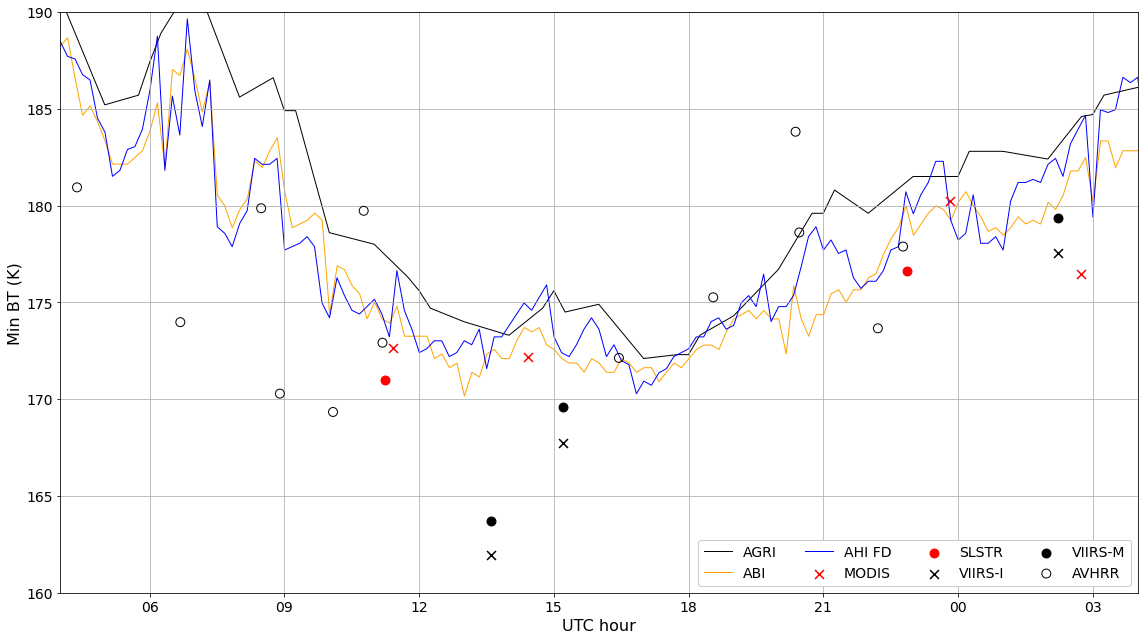

In [23]:
# Now we make the figure 3 plot. This is a rather convoluted process.

fig, ax = plt.subplots(figsize=(16,9))

# Some basic variables to define plot markers
lsizer = 1
msizer = 80
mmark1 = 'x'
mmark2 = 'o'

# What value do we wish to plot? This is the minimum scene temperature
val = 'Min'

# The x-axis extent of the plot
st_d = datetime(2018, 12, 29, 4, 0, 0)
en_d = datetime(2018, 12, 30, 4, 0, 0)

# Make some nice tick marks for datetime ranges.
tick_arr = np.array([st_d + timedelta(hours=i) for i in range(0, 36, 12)])
hfmt = dates.DateFormatter('%H')

# These for lines, which we use for the geostationary data
ax.plot(np.array(agri['Time']),
        agri[val],
        linewidth=lsizer,
        c='black',
        label='AGRI',
        zorder=1)
ax.plot(np.array(abi['Time']),
        abi[val],
        linewidth=lsizer,
        c='orange',
        label='ABI',
        zorder=1)
ax.plot(np.array(ahi_f['Time']),
        ahi_f[val],
        linewidth=lsizer,
        c='blue',
        label='AHI FD',
        zorder=1)

# Lines don't work well for polar sats due to the infrequent overpasses.
# So use a scatterplot instead.
ax.scatter(modis['Time'],
           modis[val],
           s=msizer,
           c='red',
           label='MODIS',
           marker=mmark1,
           zorder=2)
ax.scatter(slstr['Time'],
           slstr[val],
           s=msizer,
           c='red',
           label='SLSTR',
           marker=mmark2,
           zorder=2)
ax.scatter(viirs_i['Time'],
           viirs_i[val],
           s=msizer,
           c='black',
           label='VIIRS-I',
           marker=mmark1,
           zorder=2)
ax.scatter(viirs_m['Time'],
           viirs_m[val],
           s=msizer,
           c='black',
           label='VIIRS-M',
           marker=mmark2,
           zorder=2)
ax.scatter(avhrr['Time'],
           avhrr[val],
           s=msizer,
           label='AVHRR',
           marker=mmark2,
           facecolors='none',
           edgecolors='black',
           zorder=2)

# Add gridlines and set axis limits, labels, etc
plt.grid()
ax.set_xlim([st_d, en_d])
ax.set_ylim([160, 190])
ax.xaxis.set_major_formatter(hfmt)
ax.set_xlabel('UTC hour', fontsize=16)
ax.set_ylabel('Min BT (K)', fontsize=16)

# Add a legend in the bottom right
ax.legend(loc=4, ncol=4, framealpha=1., fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()
plt.savefig('../Figures/Figure_3.png', facecolor='white')
plt.savefig('../Figures/Figure_3.eps', format='eps', facecolor='white')